### **Laboratorio 8**

- Juan Pablo Solis
- Diego Garcia

### **Link de github**
https://github.com/JPS4321/Lab8_DL


## **Investigacioin**

### **Modelo VGG16**
**Describir la arquitectura general de VGG16 (número de capas, tipo de
convoluciones, tamaño de entrada, número de parámetros)**

El modelo VGG16 es una arquitectura de red neuronal convolucional desarrollada por el Visual Geometry Group (VGG) de la Universidad de Oxford. Está compuesta por 16 capas con pesos entrenables, de las cuales 13 son convolucionales y 3 son totalmente conectadas. Utiliza filtros de 3x3 con paso (stride) de 1 y padding de 1, junto con capas de max pooling de 2x2 después de ciertos bloques de convolución. La entrada esperada de la red es una imagen de 224x224 píxeles con tres canales (RGB). En total, el modelo tiene aproximadamente 138 millones de parámetros, lo que lo hace uno de los modelos clásicos más grandes y detallados.

**Explicar en qué dataset fue preentrenado (ImageNet) y cómo se puede
adaptar para un nuevo problema de clasificación**

Fue preentrenado en el dataset ImageNet, que contiene más de 1.2 millones de imágenes distribuidas en 1000 clases. Este entrenamiento previo le permite servir como base para tareas de transferencia de aprendizaje: se pueden congelar las capas convolucionales (que extraen características genéricas) y reemplazar o ajustar las capas finales para adaptarlo a un nuevo problema de clasificación con diferente número de clases.

### **Dataset CIFAR**

**Describir brevemente las características del dataset (número de clases,
tamaño de imágenes, conjunto de entrenamiento y prueba).**

El dataset CIFAR (Canadian Institute for Advanced Research) es un conjunto de imágenes pequeñas ampliamente utilizado para entrenar y evaluar modelos de clasificación de imágenes. Existen dos variantes comunes: CIFAR-10 y CIFAR-100. En CIFAR-10 hay 10 clases (como aviones, autos, gatos, perros, etc.), mientras que en CIFAR-100 hay 100 clases más detalladas. Cada imagen tiene un tamaño de 32x32 píxeles con 3 canales (RGB), y el conjunto de datos se divide en 50,000 imágenes para entrenamiento y 10,000 para prueba.

**Explicar cómo se deben aplicar las transformaciones y normalizaciones de
las imágenes para que sean compatibles con VGG16**

Para usar CIFAR con VGG16, es necesario redimensionar las imágenes a 224x224 píxeles, ya que ese es el tamaño de entrada esperado por el modelo. Además, se deben normalizar los valores de los píxeles utilizando las mismas estadísticas que el modelo preentrenado en ImageNet, osea restar la media [0.485, 0.456, 0.406] y dividir por la desviación estándar [0.229, 0.224, 0.225] por canal.

### **Implementacion de modelo**

#### **Evaluacion sin entrenamiento adicional**

In [11]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Cargar dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalizar valores (0-1)
x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32') / 255.0

# Codificar etiquetas
y_train = to_categorical(y_train, 10)
y_test  = to_categorical(y_test, 10)

print("Tamaño de entrenamiento:", x_train.shape)
print("Tamaño de prueba:", x_test.shape)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step
Tamaño de entrenamiento: (50000, 32, 32, 3)
Tamaño de prueba: (10000, 32, 32, 3)


In [3]:
# VGG16 sin la capa fully connected final
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
base_model.summary()


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 4, 4, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 1, 1, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

### **Evaluacion sin entrenamineto adicional (Parte A)**

In [4]:
# Congelar todas las capas
for layer in base_model.layers:
    layer.trainable = False

# Crear nuevo modelo con capa final para 10 clases
model_a = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(10, activation='softmax')
])

# Compilar para evaluar
model_a.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Evaluar sin entrenamiento (solo forward pass)
loss_a, acc_a = model_a.evaluate(x_test, y_test, verbose=1)

print(f"Evaluación sin entrenamiento → Loss: {loss_a:.4f}, Accuracy: {acc_a:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.0990 - loss: 2.6581
Evaluación sin entrenamiento → Loss: 2.6630, Accuracy: 0.1001


El modelo VGG16 preentrenado en ImageNet no reconoce correctamente las clases del dataset CIFAR-10, ya que nunca fue ajustado a ese dominio.
El 11 % de precisión es casi igual al azar

### **Feature Extraction (Parte B)**

In [5]:
# Congelar capas convolucionales del modelo base
for layer in base_model.layers:
    layer.trainable = False

# Crear modelo nuevo para fine-tuning solo de la capa final
model_b = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# Compilar
model_b.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar solo la capa de clasificación
history_b = model_b.fit(
    x_train, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(x_test, y_test),
    verbose=1
)


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 19ms/step - accuracy: 0.3973 - loss: 1.6979 - val_accuracy: 0.5539 - val_loss: 1.2820
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.5407 - loss: 1.3139 - val_accuracy: 0.5668 - val_loss: 1.2238
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.5641 - loss: 1.2515 - val_accuracy: 0.5807 - val_loss: 1.1823
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.5792 - loss: 1.2052 - val_accuracy: 0.5883 - val_loss: 1.1673
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.5844 - loss: 1.1852 - val_accuracy: 0.5984 - val_loss: 1.1540
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.5915 - loss: 1.1611 - val_accuracy: 0.5965 - val_loss: 1.1439
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.6062 - loss: 1.1334 - val_accuracy: 0.6042 - val_loss: 1.1349
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.6011 - loss: 1.1301 - 

In [6]:
# Evaluar en conjunto de entrenamiento y prueba
loss_train_b, acc_train_b = model_b.evaluate(x_train, y_train, verbose=0)
loss_test_b, acc_test_b   = model_b.evaluate(x_test,  y_test,  verbose=0)

print(f"Entrenamiento → Loss: {loss_train_b:.4f}, Accuracy: {acc_train_b:.4f}")
print(f"Prueba → Loss: {loss_test_b:.4f}, Accuracy: {acc_test_b:.4f}")


Entrenamiento → Loss: 0.9793, Accuracy: 0.6600
Prueba → Loss: 1.1145, Accuracy: 0.6120


En este caso el modelo sí aprendió a mapear las características convolucionales de VGG16 (que permanecen congeladas) hacia las clases de CIFAR-10 a través de la nueva capa densa.
El aumento de accuracy a un 60% demuestra que las features extraídas de ImageNet son reutilizables para tareas nuevas con algo de entrenamiento.

### **Fine Tuning**

In [7]:
# Descongelar todas las capas del modelo base
for layer in base_model.layers:
    layer.trainable = True

# Crear modelo completo reutilizando estructura anterior
model_c = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# Mostrar capas entrenables
print("Capas entrenables:", len(model_c.trainable_weights))


Capas entrenables: 30


In [8]:
# Compilar con tasa de aprendizaje pequeña
model_c.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model_c.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 1, 1, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,586 (56.64 MB)

 Trainable params: 14,848,586 (56.64 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Entrenar el modelo completo (fine-tuning)
history_c = model_c.fit(
    x_train, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(x_test, y_test),
    verbose=1
)


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 69s 72ms/step - accuracy: 0.4091 - loss: 1.6773 - val_accuracy: 0.7237 - val_loss: 0.8087
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 49s 63ms/step - accuracy: 0.7133 - loss: 0.8499 - val_accuracy: 0.7650 - val_loss: 0.6871
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 50s 63ms/step - accuracy: 0.7714 - loss: 0.6849 - val_accuracy: 0.7830 - val_loss: 0.6286
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 49s 63ms/step - accuracy: 0.8031 - loss: 0.5867 - val_accuracy: 0.8004 - val_loss: 0.5942
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 50s 63ms/step - accuracy: 0.8314 - loss: 0.5064 - val_accuracy: 0.8132 - val_loss: 0.5569
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 49s 63ms/step - accuracy: 0.8468 - loss: 0.4557 - val_accuracy: 0.8265 - val_loss: 0.5114
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 50s 63ms/step - accuracy: 0.8656 - loss: 0.3991 - val_accuracy: 0.8255 - val_loss: 0.5198
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 50s 63ms/step - accuracy: 0.8861 - loss: 0.3428 - 

In [10]:
# Evaluar en conjunto de entrenamiento y prueba
loss_train_c, acc_train_c = model_c.evaluate(x_train, y_train, verbose=0)
loss_test_c,  acc_test_c  = model_c.evaluate(x_test,  y_test,  verbose=0)

print(f"Entrenamiento → Loss: {loss_train_c:.4f}, Accuracy: {acc_train_c:.4f}")
print(f"Prueba → Loss: {loss_test_c:.4f}, Accuracy: {acc_test_c:.4f}")


Entrenamiento → Loss: 0.1981, Accuracy: 0.9369
Prueba → Loss: 0.5156, Accuracy: 0.8346


### Comparación de configuraciones

In [20]:
histories = {
    "A) Eval sin entrenamiento": None,      # no hay history
    "B) Feature extraction": globals().get("history_b", None),
    "C) Fine-tuning": globals().get("history_c", None),
}

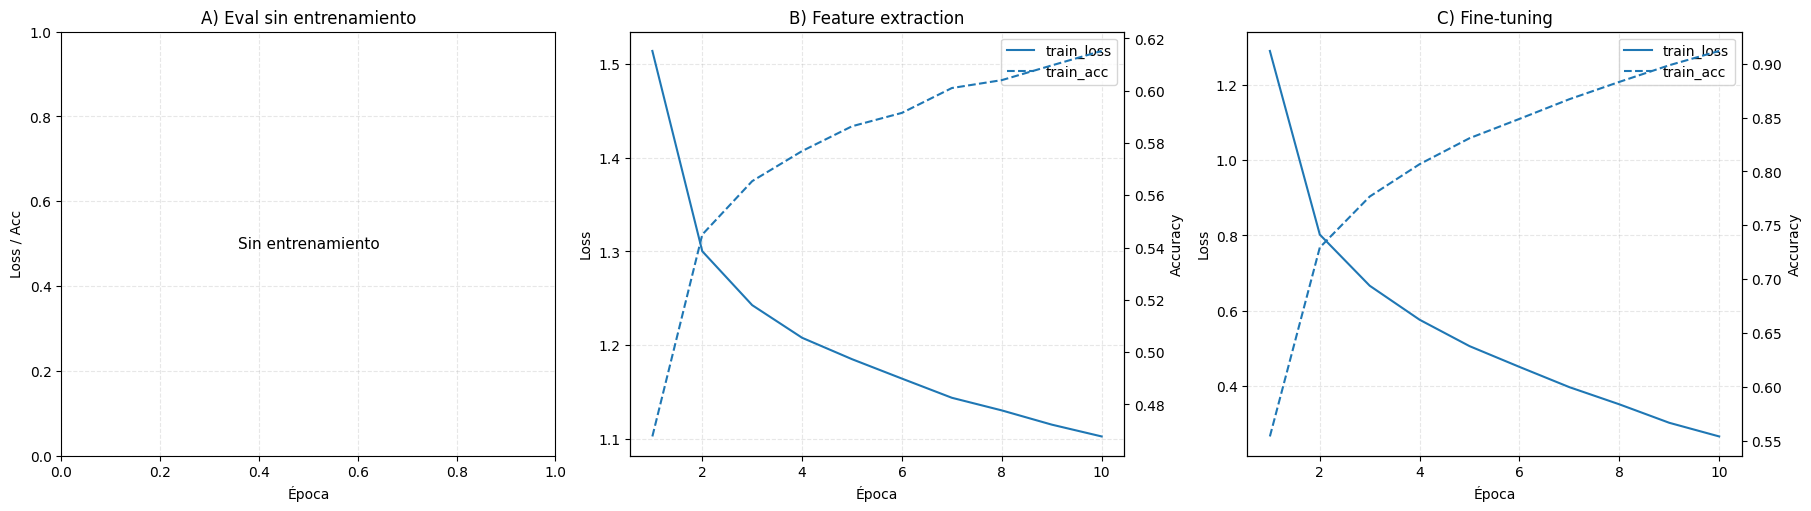

In [21]:
# Práctica

def _plot_train_panel(ax, title, hist):
    ax.set_title(title)
    if hist is None or not hasattr(hist, "history"):
        ax.text(0.5, 0.5, "Sin entrenamiento", ha="center", va="center", fontsize=11)
        ax.set_xlabel("Época"); ax.set_ylabel("Loss / Acc")
        ax.grid(True, linestyle="--", alpha=0.3)
        return

    h = hist.history
    epochs = range(1, len(h.get("loss", [])) + 1)

    # Curva de loss (eje principal)
    if "loss" in h:
        ax.plot(epochs, h["loss"], label="train_loss")
        ax.set_ylabel("Loss")

    # Curva de accuracy (eje secundario) si existe
    ax2 = ax.twinx()
    if "accuracy" in h:
        ax2.plot(epochs, h["accuracy"], linestyle="--", label="train_acc")
        ax2.set_ylabel("Accuracy")

    ax.set_xlabel("Época")
    ax.grid(True, linestyle="--", alpha=0.3)

    # Leyenda combinada si hay ambas curvas
    lines, labels = ax.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    if lines or lines2:
        ax.legend(lines + lines2, labels + labels2, loc="best")

fig, axes = plt.subplots(1, 3, figsize=(18, 5), constrained_layout=True)
for ax, (name, hist) in zip(axes, histories.items()):
    _plot_train_panel(ax, name, hist)

plt.show()

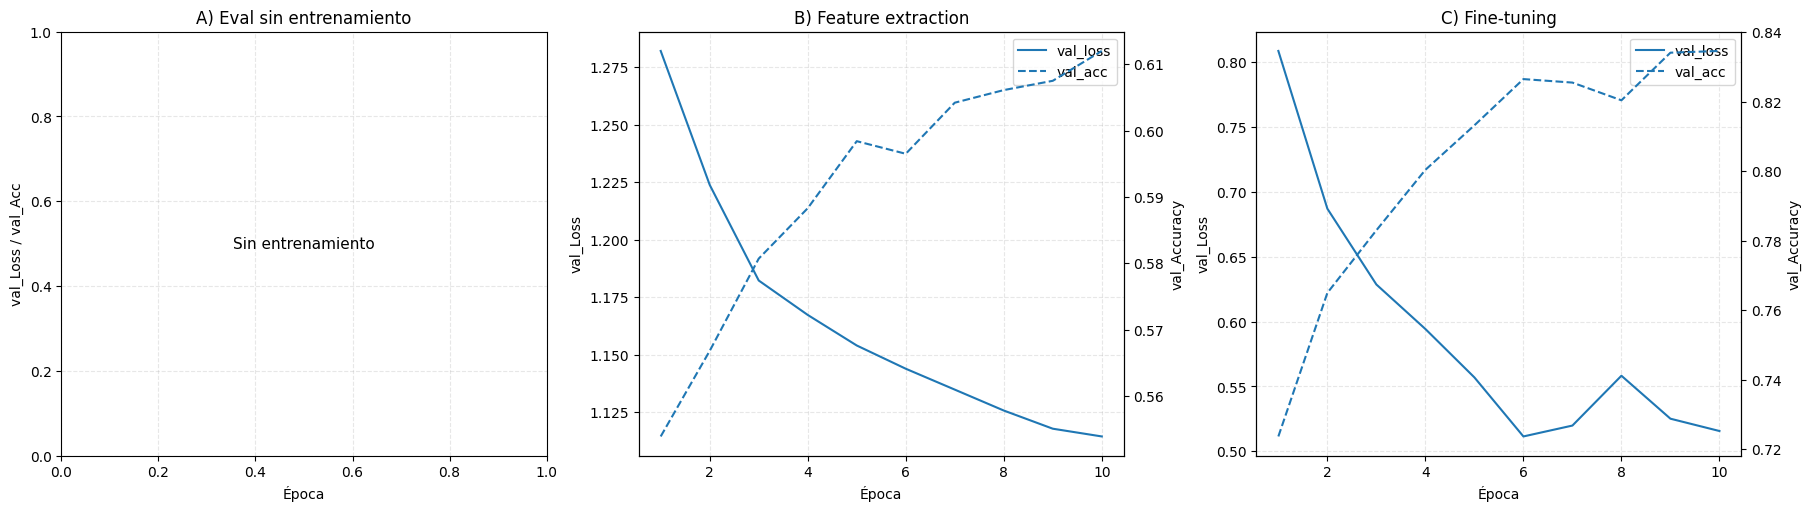

In [22]:
# Validación

def _plot_val_panel(ax, title, hist):
    ax.set_title(title)
    if hist is None or not hasattr(hist, "history"):
        ax.text(0.5, 0.5, "Sin entrenamiento", ha="center", va="center", fontsize=11)
        ax.set_xlabel("Época"); ax.set_ylabel("val_Loss / val_Acc")
        ax.grid(True, linestyle="--", alpha=0.3)
        return

    h = hist.history
    # Intenta ambas convenciones: 'val_loss'/'val_accuracy' y 'val_acc'
    val_loss = h.get("val_loss", [])
    val_acc  = h.get("val_accuracy", h.get("val_acc", []))
    epochs = range(1, max(len(val_loss), len(val_acc)) + 1)

    # val_loss (eje principal)
    if len(val_loss) > 0:
        ax.plot(epochs, val_loss, label="val_loss")
        ax.set_ylabel("val_Loss")

    # val_accuracy (eje secundario) si existe
    ax2 = ax.twinx()
    if len(val_acc) > 0:
        ax2.plot(epochs, val_acc, linestyle="--", label="val_acc")
        ax2.set_ylabel("val_Accuracy")

    ax.set_xlabel("Época")
    ax.grid(True, linestyle="--", alpha=0.3)

    # Leyenda combinada si hay ambas curvas
    lines, labels = ax.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    if lines or lines2:
        ax.legend(lines + lines2, labels + labels2, loc="best")

fig, axes = plt.subplots(1, 3, figsize=(18, 5), constrained_layout=True)
for ax, (name, hist) in zip(axes, histories.items()):
    _plot_val_panel(ax, name, hist)

plt.show()

**Práctica**
|Configuración|Accuracy|Loss|
|--------|----------|--------|
|Sin entrenamiento adicional|0.0990|2.6581|
|Feature extraction|0.6600|0.9793|
|Fine-tunnig|0.9369|0.1981|
<br>

**Validación**
|Configuración|Accuracy|Loss|
|--------|----------|--------|
|Sin entrenamiento adicional|0.1001|2.6630|
|Feature extraction|0.6120|1.1145|
|Fine-tunnig|0.8346|0.5156|

- **¿Qué método alcanzó el mejor rendimiento general?**<br>
El de fine-tunning, con diferencia. Es el único que supera con claridad a los otros en la validación y en el entrenamiento.

- **¿Qué diferencias se observan entre feature extraction y fine-tuning?**<br>
Con feature extraction, el modelo obtiene mejores resultados que el de sin entrenamiento, pero se estanca en un accuracy apenas arriba de la media. Por otro lado, el de fine-tunning se puede ver como la curva de accuracy sigue mejorando con el tiempo y que la de loss cae más. La calidad aumenta pero también existe el riesgo de sobreajuste.

- **¿Cuál de las tres estrategias resulta más eficiente considerando el tiempo de entrenamiento y la cantidad de parámetros ajustados?**<br>
Si se habla de eficiencia, el mejor modelo sería el de fine-tunnig, ya que toma mucho menos tiempo y ocupa pocos parámetros y sus resultados pueden llegar a tener validez.